# Анализ постов в сообществе ВКонтакте "Хочу в НИУ ВШЭ" #

## Выгрузка датасета ##

- **'id'** – уникальный номер поста
- **'text'** – содержание поста
- **'likes'** – количество лайков под публикацией
- **'date'** – дата загрузки поста в группу в формате: год-месяц-день час:минута:секунда

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('posts.csv')
data.head()

,id,text,likes,date
0,63043,17 марта в 12:00 мск представители кампусов НИ...,22,2024-03-07 16:23:42
1,63062,"Конституция, ветви власти, пирамида потребност...",26,2024-03-22 18:49:30
2,63061,7 апреля состоится День открытых дверей бакала...,7,2024-03-21 15:00:04
3,63059,"Делимся дайджестом мероприятий, на которые сто...",9,2024-03-19 13:35:15
4,63057,NaN,16,2024-03-17 12:04:35


In [5]:
data.shape[0]

14876

Узнаём, что в 'DataFrame' 14876 постов. Как я выяснила во время выгрузки датасета, в нём нет пропущенных значений, однако формат даты не совсем подходящий для анализа, поэтому я переместилась в Google Spreadsheets, где с помощью разделителя "-" сначала разделила дату на три столбца:

<image src="/images/1.png" alt=" ">

После с помощью разделителей " " и ":" разделила столбец 'date' на шесть столбцов, столбец с секундами я удалила, так как его влияние на данные минимально и вовсе отсутствует:

<image src="/images/2.png" alt=" ">

Также я удалила столбец с содержанием постов, его невозможно интерпретировать, так как все посты очень разные и неоднородные. Полученный датасет я загрузила в блокнот. 

- **'id'** – уникальный номер поста
- **'likes'** – количество лайков под публикацией
- **'day'** – день загрузки поста в группу 
- **'month'** – месяц загрузки поста в группу
- **'year'** – год загрузки поста в группу
- **'time_hours'** – время загрузки поста в группу (часы)
- **'time_minutes'** – время загрузки поста в группу (минуты)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('posts_1.csv')
df.head()

,id,likes,day,month,year,time_hours,time_minutes
0,63043,22,7,3,2024,16,23
1,63062,26,22,3,2024,18,49
2,63061,7,21,3,2024,15,0
3,63059,9,19,3,2024,13,35
4,63057,16,17,3,2024,12,4


In [38]:
mean_likes = df['likes'].mean()
mode_likes = df['likes'].mode()
median_likes = df['likes'].median()

print("Среднее арифметическое для столбца 'likes':", mean_likes)
print("Мода для столбца 'likes':", mode_likes)
print("Медиана для столбца 'likes':", median_likes)

Среднее арифметическое для столбца 'likes': 4.465111589136865
Мода для столбца 'likes': 0    0
Name: likes, dtype: int64
Медиана для столбца 'likes': 0.0


Как мы видим из результатов описательной статистики, подписчики группы не очень активны. Среднее число лайков на постах – 4 (4.47) (подписчиков: 30984), то есть среднее количество лайков на постах составляет только 0,013% от числа подписчиков. При этом мода и медиана равны 0, это показывает, что большее количество постов остаются совершенно без лайков. Это означает, что в среднем посты в группе получают примерно 4-5 лайков, но большинство постов не имеют лайков вообще.

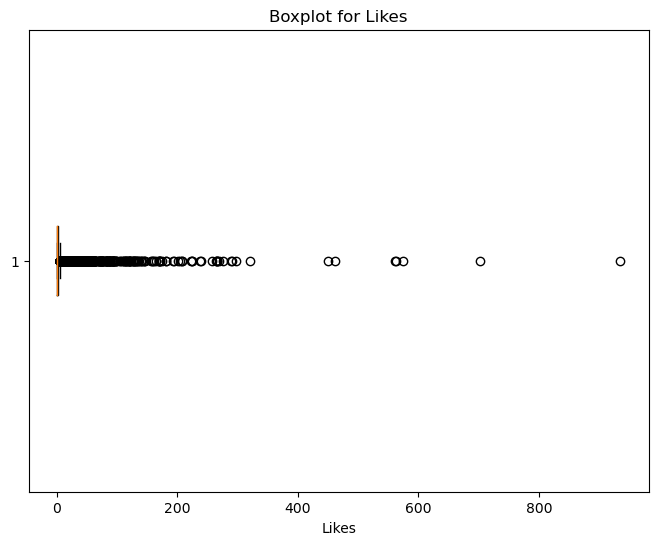

In [41]:
Q1 = df['likes'].quantile(0.25)
Q3 = df['likes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['likes'] < lower_bound) | (df['likes'] > upper_bound)]

plt.figure(figsize=(8, 6))
plt.boxplot(df['likes'], vert=False)
plt.title('Boxplot for Likes')
plt.xlabel('Likes')
plt.show()

Из-за выводов после использования методов описательной статистики я решила построить ящик с усами. Как мы видим справа очень много выбросов: есть пост, который набрал более 800 лайков. Основное количество выбросов в пределах от 0 до 200 лайков.

In [42]:
max_likes = df['likes'].max()
min_likes = df['likes'].min()

print("Максимальное значение для столбца 'likes':", max_likes)
print("Минимальное значение для столбца 'likes':", min_likes)

Максимальное значение для столбца 'likes': 935
Минимальное значение для столбца 'likes': 0


Теперь мы знаеим, что максимальное количество лайков за пост равно 935.

Отсортировав в Гугл Таблицах диапазон по столбцу 'likes', я выяснила, что пост с максмальным количеством лайков не содержал никакой текст:

![Ячейка с постом с самым большим количеством лайков](/images/3.png)

In [43]:
df_filtered = df[(df['likes'] >= lower_bound) & (df['likes'] <= upper_bound)]

Удаляю выбросы, чтобы сравнить результаты статистики изначальных данных с очищенными и понят сильно ли влияют выбросы на результыты.

In [45]:
max_likes_1 = df_filtered['likes'].max()
min_likes_1 = df_filtered['likes'].min()
mean_likes_1 = df_filtered['likes'].mean()
mode_likes_1 = df_filtered['likes'].mode()
median_likes_1 = df_filtered['likes'].median()

print("Максимальное значение для столбца 'likes':", max_likes_1)
print("Минимальное значение для столбца 'likes':", min_likes_1)

print("Среднее арифметическое для отсортированного столбца 'likes':", mean_likes_1)
print("Мода для отсортированного столбца 'likes':", mode_likes_1)
print("Медиана для отсортированного столбца 'likes':", median_likes_1)

Максимальное значение для столбца 'likes': 5
Минимальное значение для столбца 'likes': 0
Среднее арифметическое для отсортированного столбца 'likes': 0.68232751720826
Мода для отсортированного столбца 'likes': 0    0
Name: likes, dtype: int64
Медиана для отсортированного столбца 'likes': 0.0


По результатам видно, что выбросы оказывали сильное влияние на результаты описатнльной статистики. Например, максимальное количество лайков резко сократилось на 930 и стало равно 5. Мнимальное число лайков осталось без изменений, как и мода, и медиана. Среднее арифметическое упало до 0.7 лаков на посте. Эти результаты показывают, что активность в группе очень низкая. Это говорит о том, что большинство постов в группе, в среднем, не получают лайков, и даже после удаления выбросов остается малое количество постов, которые получают лайки. Бывают экстремальные значения, когда активность резко повышается, но как показывают данные уровень активности не держится достаточно долго. 

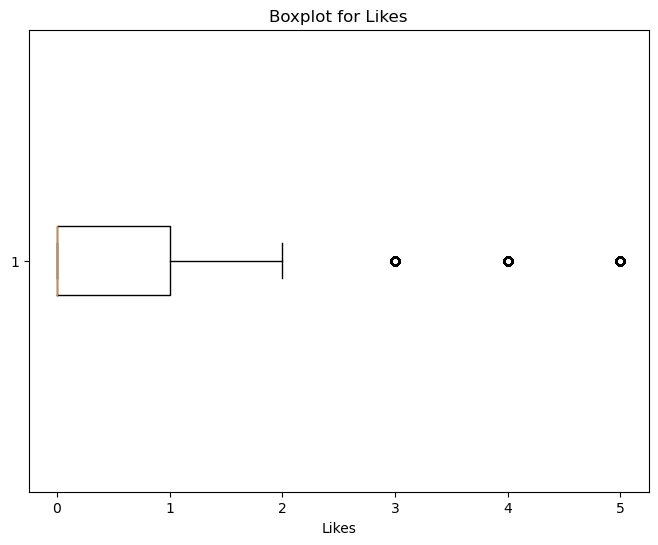

In [47]:

plt.figure(figsize=(8, 6))
plt.boxplot(df_filtered['likes'], vert=False)
plt.title('Boxplot for Likes')
plt.xlabel('Likes')
plt.show()

**Эти результаты могут быть интерпретированы как низкая активность аудитории в данной группе ВКонтакте. Возможно, что контент, размещаемый в этой группе, не вызывает интереса у большинства подписчиков, что приводит к низкому уровню взаимодействия в виде лайков. Также возможно, что группа не привлекает новых участников, что также влияет на количество лайков на постах. Однако, учитывая специфик группы можно объснить такую низкую активность её сезонностью, что я решила проверить далее.**

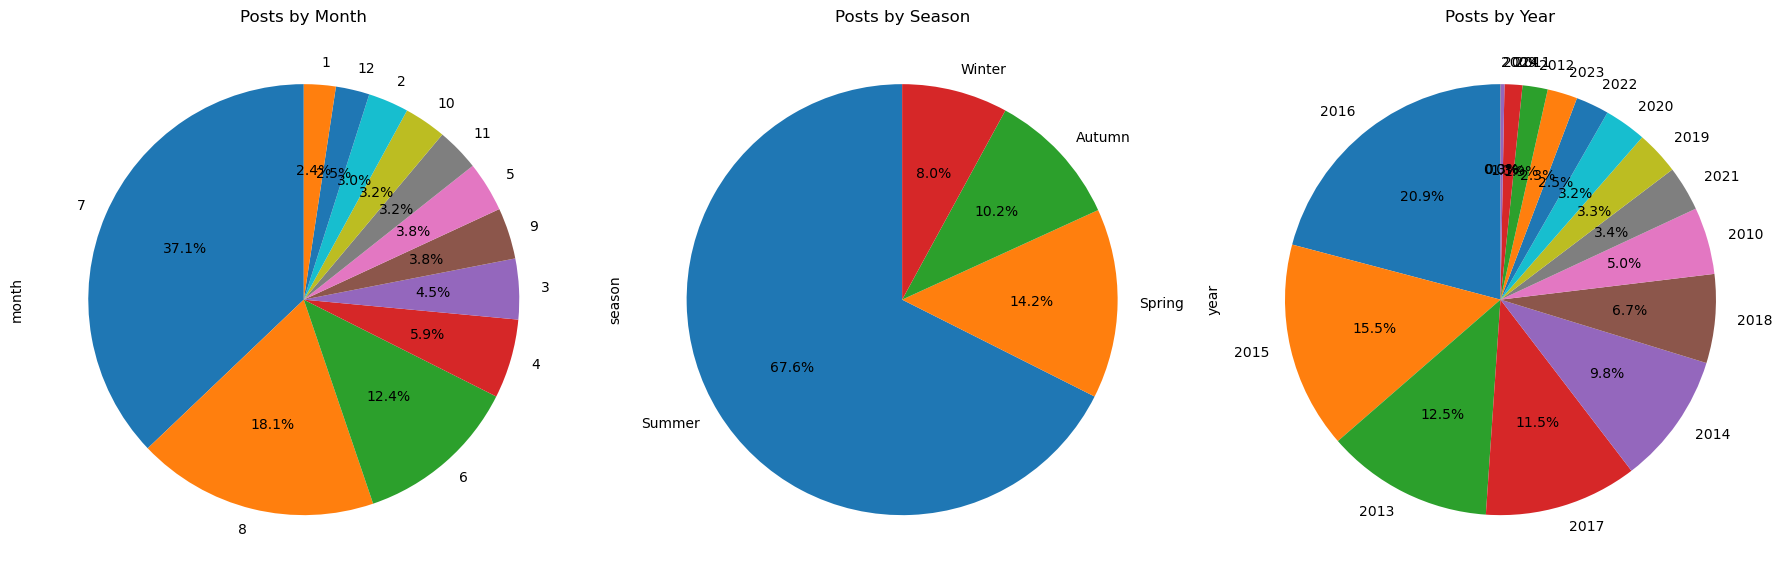

In [18]:
posts_by_month = df['month'].value_counts()

posts_by_year = df['year'].value_counts()

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

posts_by_season = df['season'].value_counts()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
posts_by_month.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Posts by Month')

plt.subplot(1, 3, 2)
posts_by_season.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Posts by Season')

plt.subplot(1, 3, 3)
posts_by_year.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Posts by Year')

plt.tight_layout()
plt.show()

Как видно из круговых диаграмм, большее количество постов выкладывается в группу в июле (примерно 37%), а в целом, большее количество постов было выложено в группу именно в летний период. Это подтвержает сезонность группы: приёмная компания проходит летом, а основные новости для поступающих обычно выклыдываются в июле. 

Также видно, что наибольшая активность в группе пришлась на 2016 год, на втором месте 2015 год. Возможно, с этим также связана низкая активность в сообществе, так как за последние 8 лет количество выкладываемых постов тоже упала. 

In [29]:
posts_july = df[df['month'] == 7].shape[0]

print("Количество постов за июль:", posts_july)

Количество постов за июль: 5521


In [32]:
summer_posts = df[df['season'] == 'Summer'].shape[0]

print("Количество постов за летний период:", summer_posts)

Количество постов за летний период: 10053


*Количество постов, выложенных в июле, составляет более 50% выложенных за летний период постов. Это самый активный месяц в группе.*

In [33]:
percentage_posts_july = (int(posts_july) / int(summer_posts)) * 100

print("Процент постов в июле от общего количества постов за лето:", percentage_posts_july)

Процент постов в июле от общего количества постов за лето: 54.91892967273451


Я решила проверить, если в июле выкладывается большее количество постов, чем в любой другой месяц, то и количество лайков должно быть бльше, чем в другие месяца.

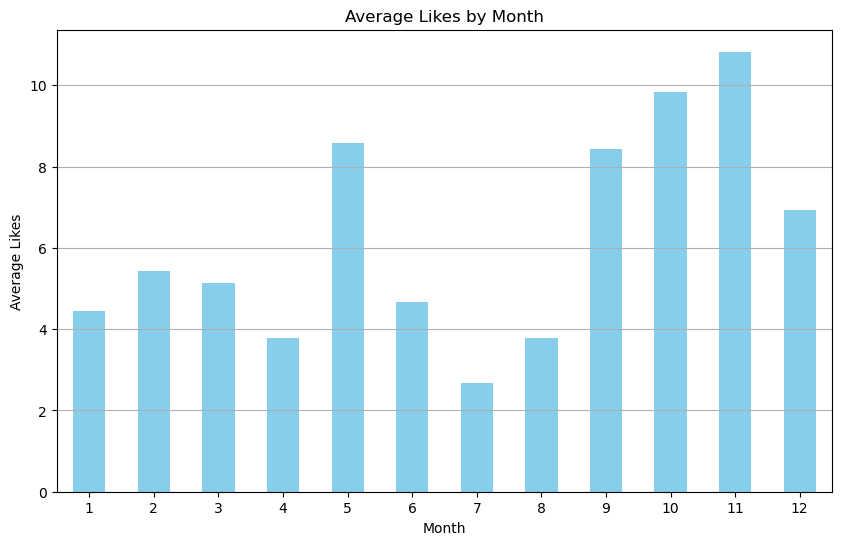

In [20]:
likes_by_month = df.groupby(df['month'])['likes'].mean()

plt.figure(figsize=(10, 6))
likes_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Likes by Month')
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

На удивление, в июле самый низкий показатель по количеству лайков. Самый высокий – в ноябре. Посмотрев Google Tаблицы, я увидела, что выбросы по лайкам, как раз приходятся на ноябрь, но, к сожалению, с чем связана такая активность выяснить6 как я отметила ранее, не удастся. 

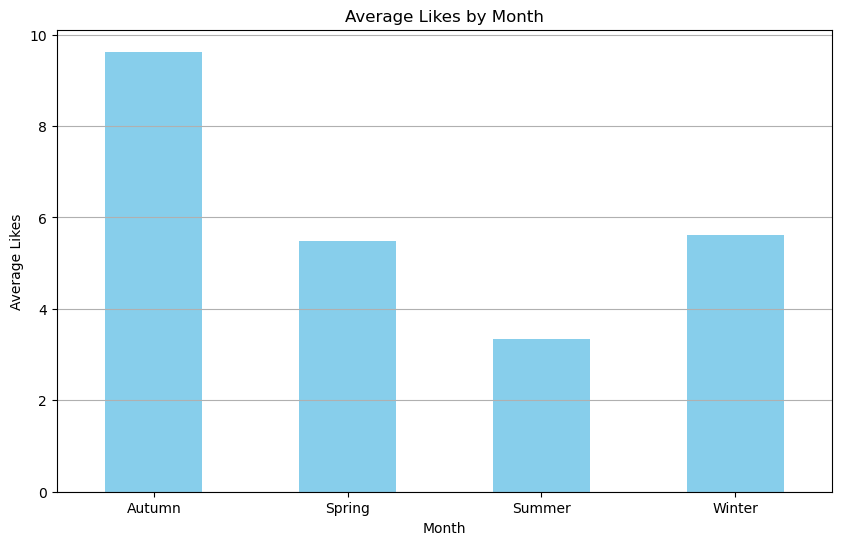

In [19]:
likes_by_month = df.groupby(df['season'])['likes'].mean()

plt.figure(figsize=(10, 6))
likes_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Likes by Month')
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

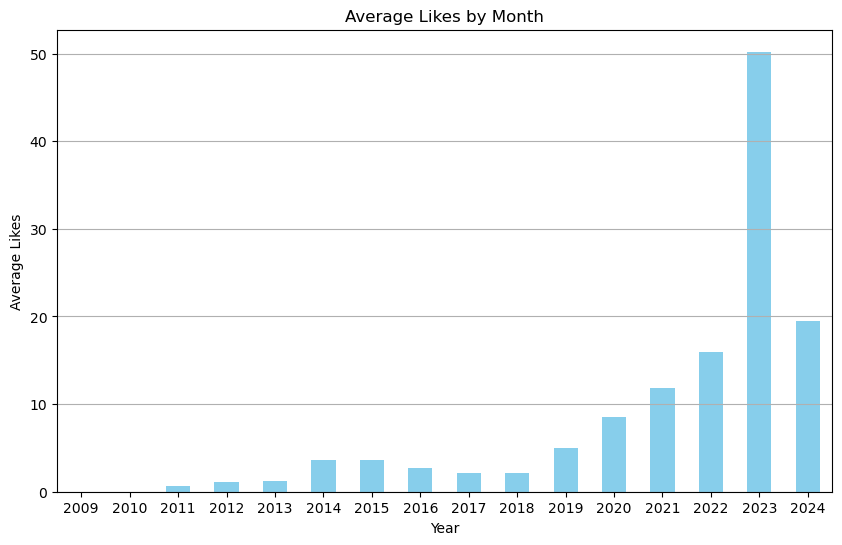

In [15]:
likes_by_month = df.groupby(df['year'])['likes'].mean()

plt.figure(figsize=(10, 6))
likes_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Likes by Month')
plt.xlabel('Year')
plt.ylabel('Average Likes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Все данные с большим количеством лайков за осенний период и в 2023 году также связан с экстремально высоким занчением лайков на посте за ноябрь 2023.

Также я решила узнать, 

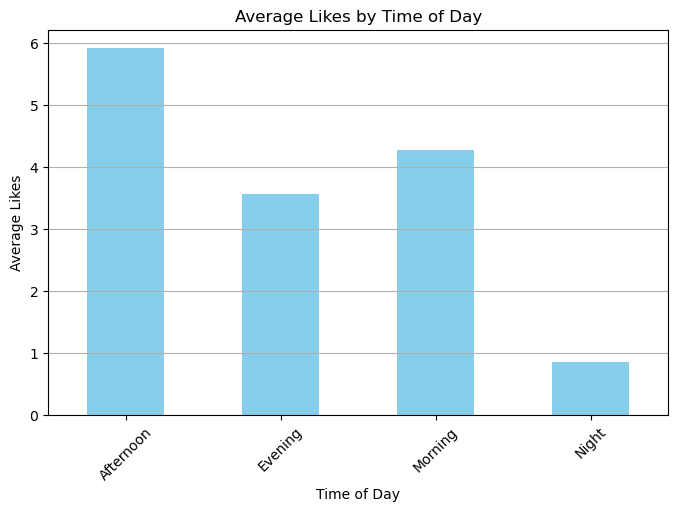

In [34]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['time_hours'].apply(time_of_day)

likes_by_time_of_day = df.groupby('time_of_day')['likes'].mean()

plt.figure(figsize=(8, 5))
likes_by_time_of_day.plot(kind='bar', color='skyblue')
plt.title('Average Likes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [49]:
correlation = df[['time_hours', 'time_minutes', 'likes', 'time_of_day']].corr()

print("Корреляция между временем публикации и числом лайков:")
print(correlation)

Корреляция между временем публикации и числом лайков:
              time_hours  time_minutes     likes
time_hours      1.000000      0.008947  0.012261
time_minutes    0.008947      1.000000 -0.008493
likes           0.012261     -0.008493  1.000000


In [51]:
correlation_likes_month = df[['likes', 'month']].corr().iloc[0, 1]

print("Корреляция между количеством лайков и месяцем:", correlation_likes_month)

Корреляция между количеством лайков и месяцем: 0.03001224963584392


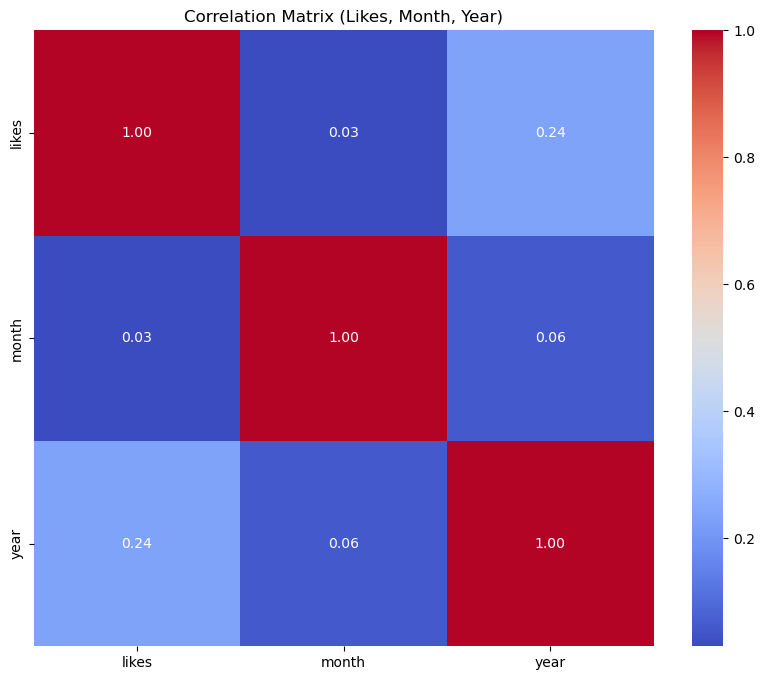

In [55]:
import seaborn as sns
df_subset = df[['likes', 'month', 'year']]

correlation_matrix = df_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Likes, Month, Year)')
plt.show()